#                                   *Data Analysis and Visualization*




- Data Analysis and Visualization refers to the process of examining, transforming, and modeling data with the goal of 
discovering meaningful insights and presenting them in visual and easy-to-understand formats. This includes exploring 
relationships between variables, identifying patterns and trends, and communicating findings through various charts,
graphs, and other visual aids.


- Data Analysis and Visualization empowers businesses with insights into customer behavior, market trends, and performance, allowing them to make informed decisions and identify growth opportunities. By communicating insights effectively and adapting quickly to changing market conditions, businesses gain a competitive edge.








- In this project, we will analyze two datasets - one from Airbnb and the other from a Human Resources department - using Python
and Jupyter Notebook. Through data analysis and visualization, we'll uncover insights into Airbnb rental market trends and 
factors affecting pricing, as well as patterns in employee demographics and job satisfaction that can improve organizational
performance. We'll utilize Python libraries such as Pandas, NumPy, and Matplotlib to manipulate, clean, and visualize the data.
The project will provide hands-on experience with real-world datasets and data analysis and visualization techniques.

Datasets:
- Airbnb dataset
- HR Dataset


# Data Cleaning and Visualization for Airbnb Dataset






In [1]:
# Importing required libraries

import pandas as pd  # for data manipulation and analysis
import numpy as np   # for mathematical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns   # for statistical data visualization
import missingno as msno # for visualize and understand missing data in a dataset






In [2]:
# Load Airbnb dataset into a Pandas dataframe
airbnb_df = df1 = pd.read_csv('Airbnb Dataset 19.csv')

In [3]:
# Display the first 5 records
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
# Print the number of rows and columns
print('Number of rows:', airbnb_df.shape[0])
print('Number of columns:', airbnb_df.shape[1])

Number of rows: 249
Number of columns: 16


In [5]:
# Information about the dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [6]:
# Count the number of missing values per column
airbnb_df.isna().sum()



id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
# ID is a unique value in the dataset from where we can identify the number of duplicate data present in the dataset
## Find duplicates values in the 'id' column
duplicates = airbnb_df.duplicated(subset= 'id', keep= False)
airbnb_df[duplicates].sort_values('id')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
# There are no duplicate value in the id column.
# The drop() function is used to remove rows or columns from the dataframe.



In [9]:
# Drop columns which are not relevent
airbnb_df.drop(['id','host_id','last_review'], axis= 1, inplace= True)

airbnb_df.describe()



,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [10]:
# Check for missing values in the dataset
missing_values = airbnb_df.isnull().sum()

# Print the number of missing values in each column
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# Identify missing values 

<AxesSubplot:>

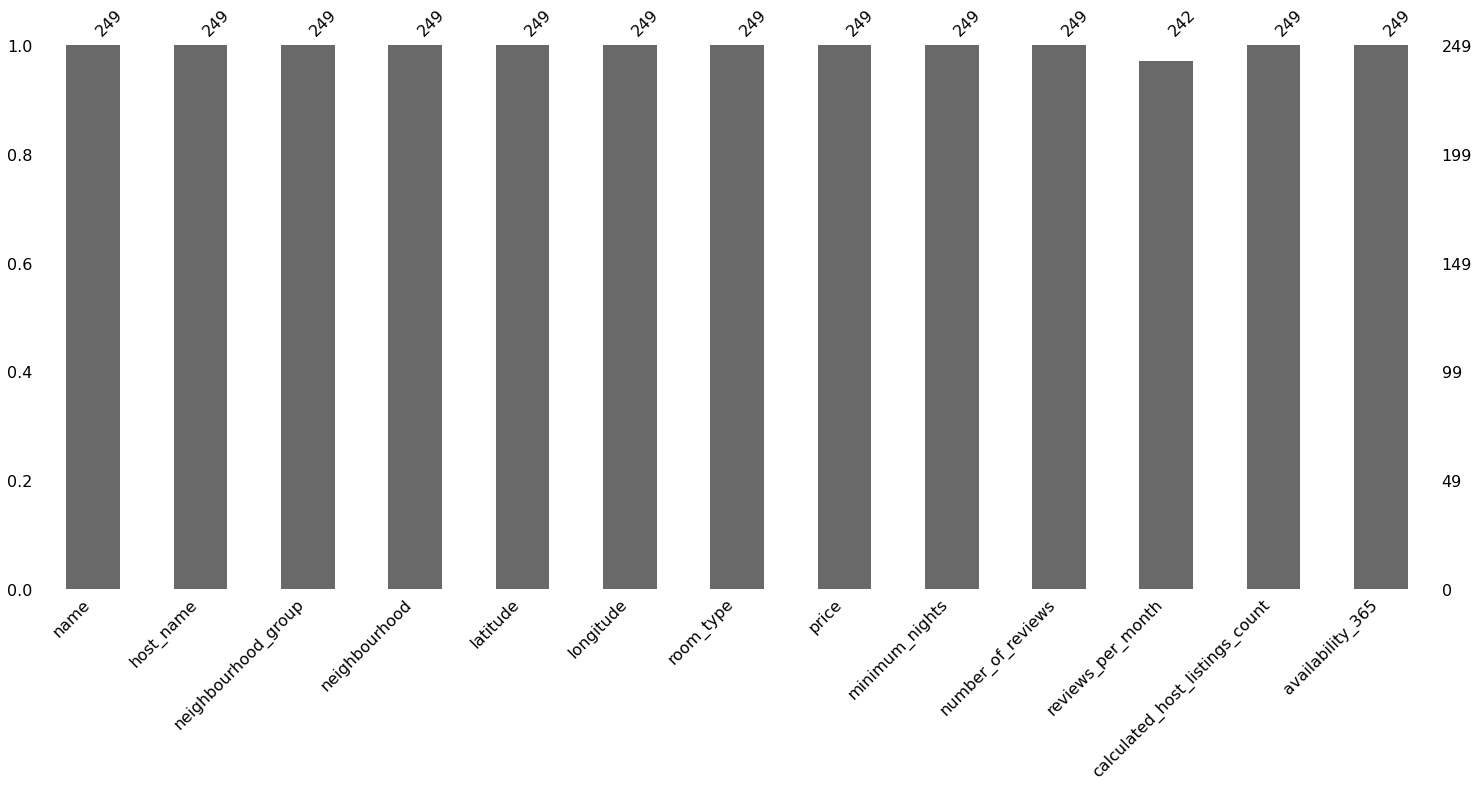

In [11]:
# Visualize missing values using the missingno library
msno.bar(airbnb_df)

In [12]:
# So Data with missing values is in reviews_per_month.
airbnb_df[airbnb_df['reviews_per_month'].isna()].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.000000,7.000000,7.000000,7.000000,7.0,0.0,7.000000,7.000000
mean,40.767837,-73.947346,133.571429,17.000000,0.0,NaN,1.285714,244.142857
std,0.078597,0.011826,58.787349,21.400935,0.0,NaN,0.487950,172.075980
min,40.637020,-73.963270,35.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,40.731045,-73.954010,105.000000,3.500000,0.0,NaN,1.000000,124.500000
50%,40.796850,-73.948720,150.000000,7.000000,0.0,NaN,1.000000,365.000000
75%,40.805680,-73.942510,170.000000,22.000000,0.0,NaN,1.500000,365.000000
max,40.867540,-73.926390,200.000000,60.000000,0.0,NaN,2.000000,365.000000


- The missing data in the 'number_of_reviews' column indicates that the corresponding Airbnb listings have never been visited or reviewed, potentially implying inactivity or no use.






In [13]:
# Replace null values in the column 'number_of_reviews' with a Zero (0)
# The fillna() function in Python is used to fill missing or null values in a pandas DataFrame or Series.
# It can be used to replace null or missing values with a specified scalar value, such as 0 or 'unknown'.



airbnb_df = airbnb_df.fillna({'reviews_per_month': 0})



In [14]:
airbnb_df.isna().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# checking  unique values in 'name' column
airbnb_df['name'].value_counts().unique().sum() 

1

The value_counts() function in Python is used to return a pandas series containing counts of unique values in a given data frame column.



In [16]:
# Values of different neighbourhood_group we have.
df1['neighbourhood_group'].value_counts()

Manhattan        124
Brooklyn         111
Queens            11
Bronx              2
Staten Island      1
Name: neighbourhood_group, dtype: int64

In [17]:
df1['neighbourhood_group'].value_counts().index

#  The .index() function in Python is used to get the index (position) of a specified element.




Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

# Visualizing the Data


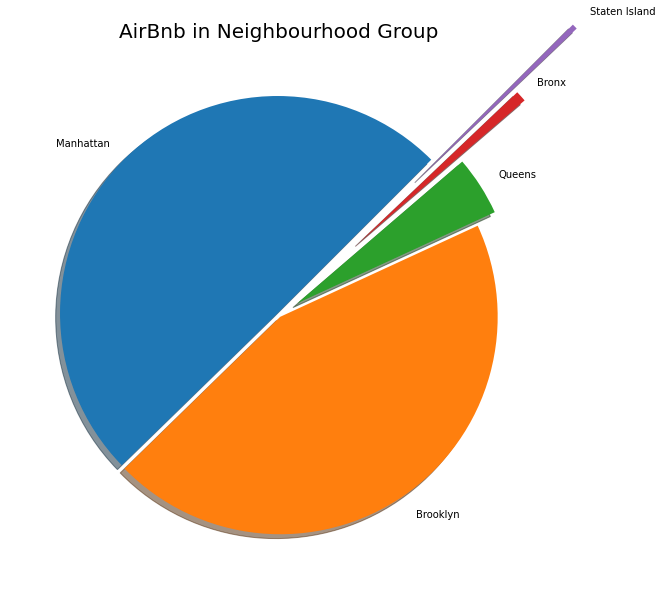

In [18]:
# Pie-chart of different neighbourhood groups.
labels = airbnb_df['neighbourhood_group'].value_counts().index
sizes = airbnb_df['neighbourhood_group'].value_counts()

plt.figure(figsize = (10, 10))
plt.pie(sizes, labels = labels,
        explode = ([0.01, 0.01, 0.1, 0.5, 0.9]), startangle= 45, shadow = True)
# Set the axis title 
plt.title('AirBnb in Neighbourhood Group', fontsize= 20)
plt.show()

A barplot is a useful way to visualize the distribution of neighbourhood groups in the Airbnb dataset's neighbourhood_group column. By examining the graph, we can quickly identify any imbalances in the data and gain a better understanding of the relative frequency of each group.






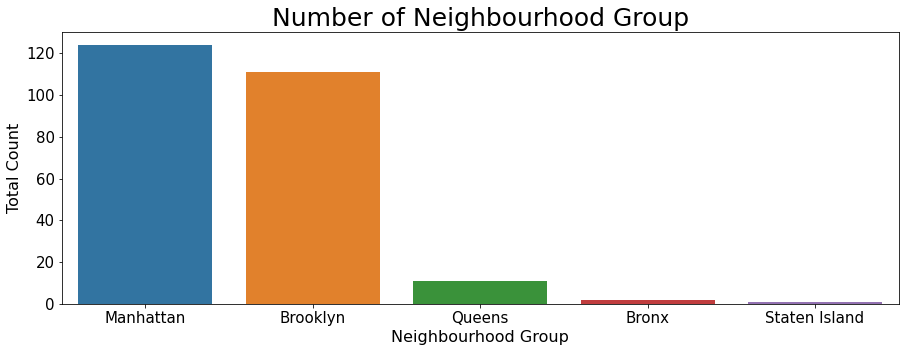

In [19]:
# Barplot of different neighbourhood_group
plt.figure(figsize = (15, 5))
sns.barplot(x=labels, y=sizes, data=airbnb_df)

# Set the axis labels and title
plt.xlabel('Neighbourhood Group', fontsize= 16)
plt.ylabel('Total Count', fontsize= 16)
plt.title('Number of Neighbourhood Group', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [20]:
#  top 10 host_name.
airbnb_df['host_name'].value_counts().head(10)

Mark               6
Lulú               3
Lisel              3
Laurine            3
Wayne              3
Jessica            3
Sara               3
Ssameer Or Trip    3
Bruce              3
Laurie             3
Name: host_name, dtype: int64

Using a countplot to visualize the top 10 host names in the host_name column allows for easy identification of the most common hosts in the dataset. This helps to gain insight into the distribution of hosts and their frequency of appearance.






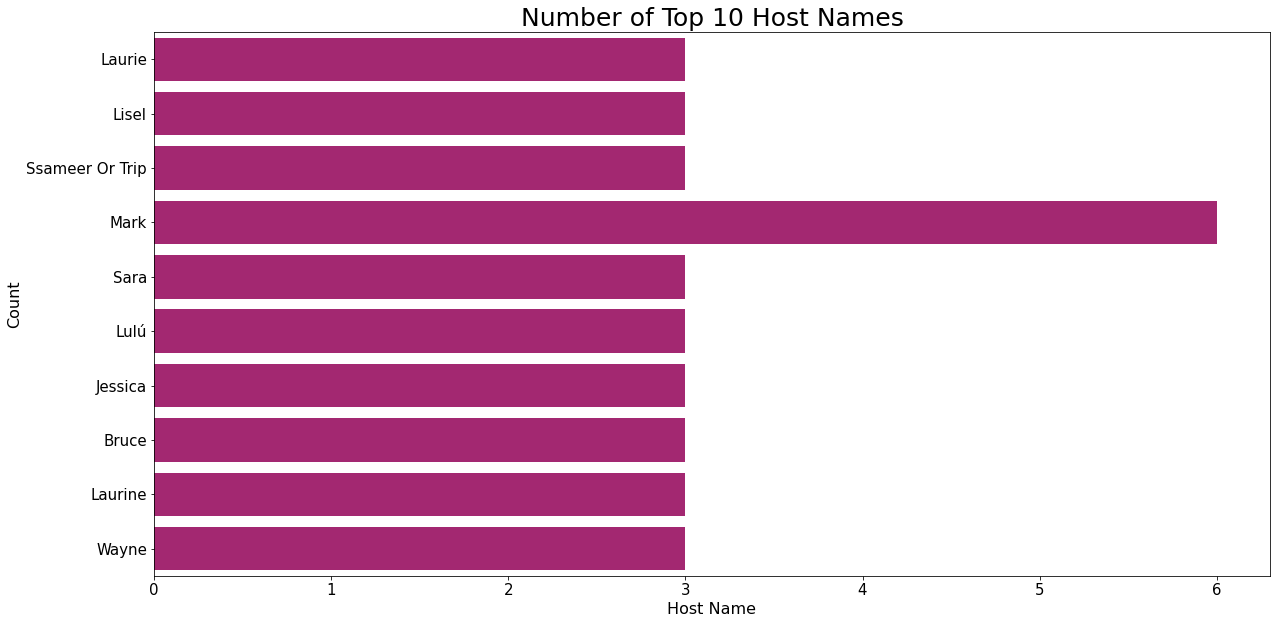

In [21]:
# Histogram of different host name
host_counts = airbnb_df['host_name'].value_counts()
top_hosts = host_counts.head(10)

# Create the countplot using only the top 10 hosts
plt.figure(figsize = (20, 10))
sns.countplot(y='host_name', data= airbnb_df[airbnb_df['host_name'].isin(top_hosts.index)], color= '#B71375')

# Set the axis labels and title
plt.xlabel('Host Name', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.title('Number of Top 10 Host Names', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [22]:
# Values of different top 15 neighbourhood.
airbnb_df['neighbourhood'].value_counts().head(10)

Williamsburg          26
Harlem                22
East Village          20
Bedford-Stuyvesant    17
Hell's Kitchen        12
Clinton Hill           9
Upper West Side        9
Fort Greene            8
West Village           8
Lower East Side        8
Name: neighbourhood, dtype: int64

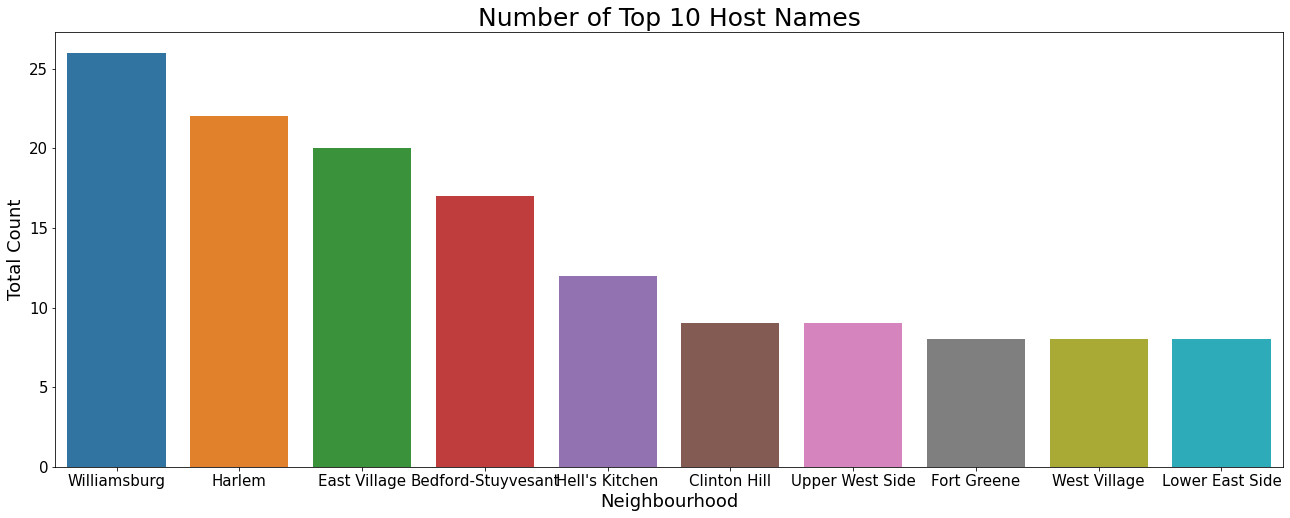

In [23]:
# Barplot of different neighbourhood
labels_nh = airbnb_df['neighbourhood'].value_counts().head(10).index
sizes_nh = airbnb_df['neighbourhood'].value_counts().head(10)

plt.figure(figsize = (22, 8))
sns.barplot(x=labels_nh, y=sizes_nh, data=df1)

# Set the axis labels and title
plt.xlabel('Neighbourhood', fontsize= 18)
plt.ylabel('Total Count', fontsize= 18)
plt.title('Number of Top 10 Host Names', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [24]:
# Visualizing the number of room types present in the room_type column using a pie chart

airbnb_df['room_type'].value_counts()


Entire home/apt    134
Private room       113
Shared room          2
Name: room_type, dtype: int64

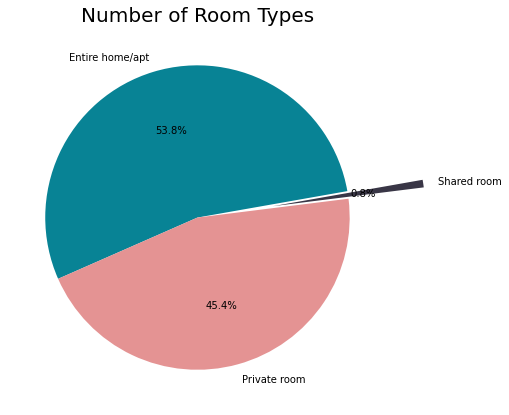

In [25]:
# Lets visualize the chart for room_types
labels_room = airbnb_df['room_type'].value_counts().index
sizes_room = airbnb_df['room_type'].value_counts()
explode = [0, 0, 0.5]
colors = ['#088395','#E49393','#393646']

plt.figure(figsize = (7, 7))
plt.pie(sizes_room, labels = labels_room,colors= colors, 
        explode= explode, autopct= '%1.1f%%', startangle= 10, shadow = False)
plt.title('Number of Room Types', fontsize= 20)
plt.show()


A barplot can visually represent the average price of each room type in the room_type column. This provides an easy comparison of average prices across different room types.






In [26]:
# Get mean price per room types.
room_type_ap = airbnb_df.groupby('room_type')['price'].mean()
room_type_ap


room_type
Entire home/apt    188.574627
Private room        92.345133
Shared room         72.500000
Name: price, dtype: float64

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


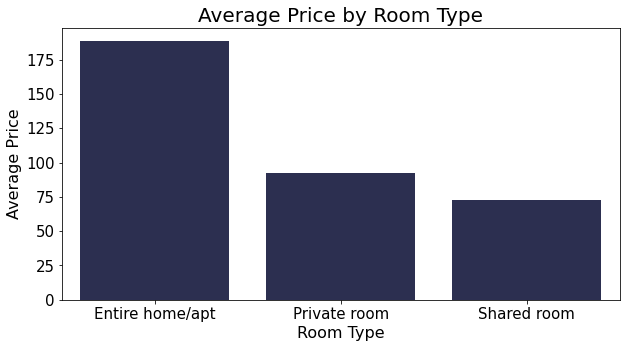

In [27]:
# Creating Barplot to show average price for each room types

plt.figure(figsize = (10, 5))
sns.barplot(room_type_ap.index, room_type_ap.values, color= '#262A56')

# Set the axis labels and title
plt.xlabel('Room Type', fontsize= 16)
plt.ylabel('Average Price', fontsize= 16)
plt.title('Average Price by Room Type', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()


Boxplot is an effective way to visualize the relationship between price and room types. Each box represents the distribution of prices for a particular room type.


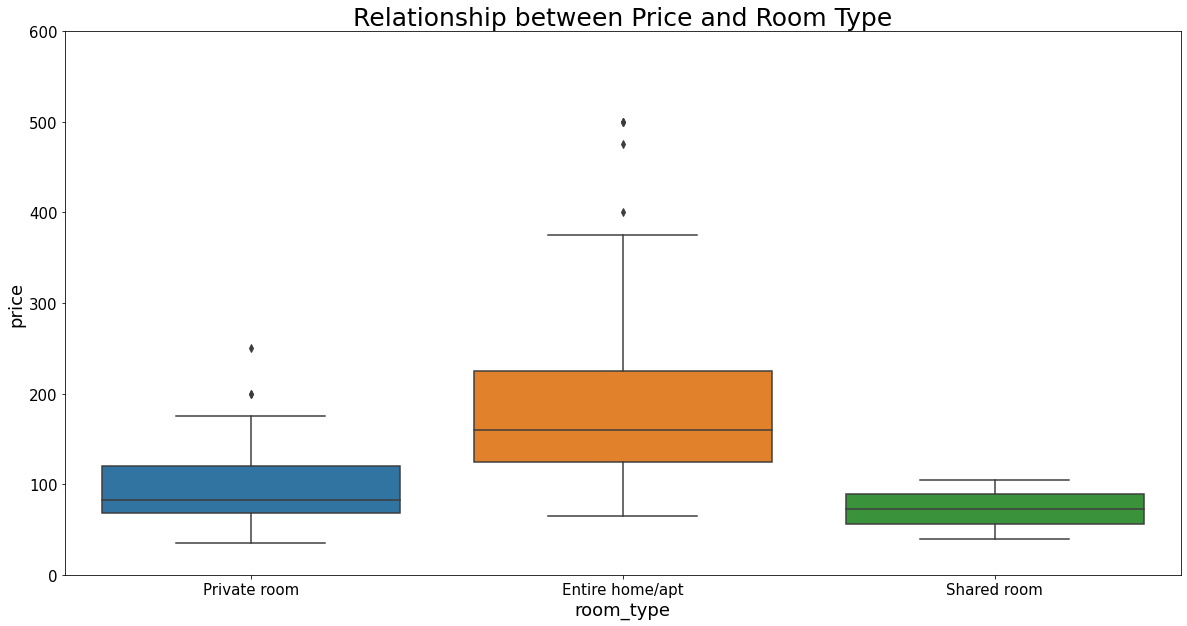

In [28]:
# Relationship between price and room_type.

plt.figure(figsize=(20,10))
sns.boxplot(x = 'room_type', y = 'price', data = airbnb_df)
plt.ylim(0, 600)

# Set the axis labels and title
plt.xlabel('room_type', fontsize= 18)
plt.ylabel('price', fontsize= 18)
plt.title('Relationship between Price and Room Type', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

A barplot is a useful way to visually compare the average price for different room types present in the dataset. It can provide insights into the relative pricing of different room types and help identify which ones are more expensive.






C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


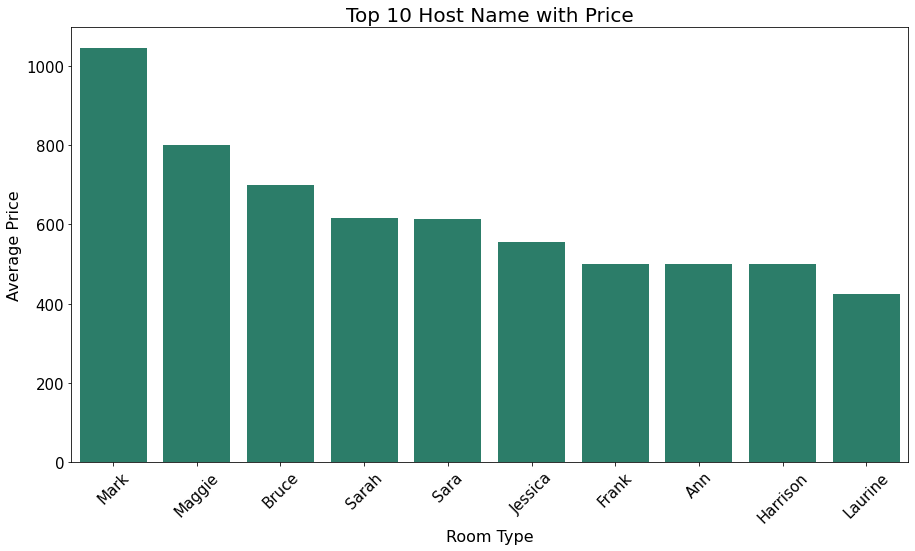

In [29]:
# Relationship between price and top 10 host_name with a barplot
host_price = airbnb_df.groupby('host_name')['price'].sum()
top_10_hosts = host_price.sort_values(ascending=False).head(10)

plt.figure(figsize = (15, 8))
sns.barplot(top_10_hosts.index, top_10_hosts.values, color= '#1F8A70')

# Set the axis labels and title
plt.xlabel('Room Type', fontsize= 16)
plt.ylabel('Average Price', fontsize= 16)
plt.title('Top 10 Host Name with Price', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xticks(rotation=45)
plt.show()

Boxplot visualizes the relationship between price and neighbourhood in the dataset, showing the distribution of prices, median, quartiles, and outliers. It helps to detect significant differences in prices across neighbourhoods and potential outliers.






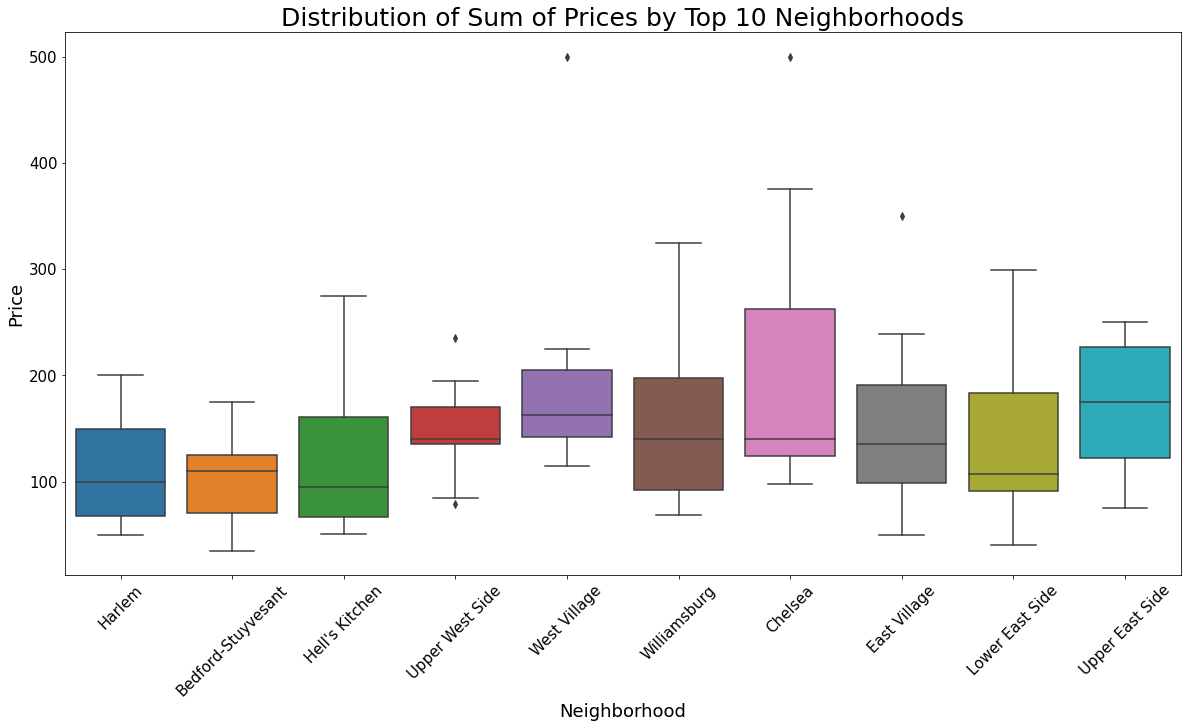

In [30]:
# Group the data by neighborhood and calculate the mean price for each group
nmean = airbnb_df.groupby('neighbourhood')['price'].sum()
top_10 = nmean.sort_values(ascending=False).head(10)
airbnb_df_top10 = airbnb_df.loc[airbnb_df['neighbourhood'].isin(top_10.index)]

plt.figure(figsize=(20, 10))
sns.boxplot(x='neighbourhood', y='price', data=airbnb_df_top10)

# Add labels and title to the plot
plt.xlabel('Neighborhood', fontsize= 18)
plt.ylabel('Price', fontsize= 18)
plt.title('Distribution of Sum of Prices by Top 10 Neighborhoods', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xticks(rotation=45)
plt.show()


A scatterplot is a useful way to visualize the correlation between latitude, longitude, and price in the Airbnb dataset. It provides a clear distribution of prices in relation to the corresponding map coordinates.






C:\Users\Sandeep Pathak\AppData\Local\Temp\ipykernel_2044\2684010838.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


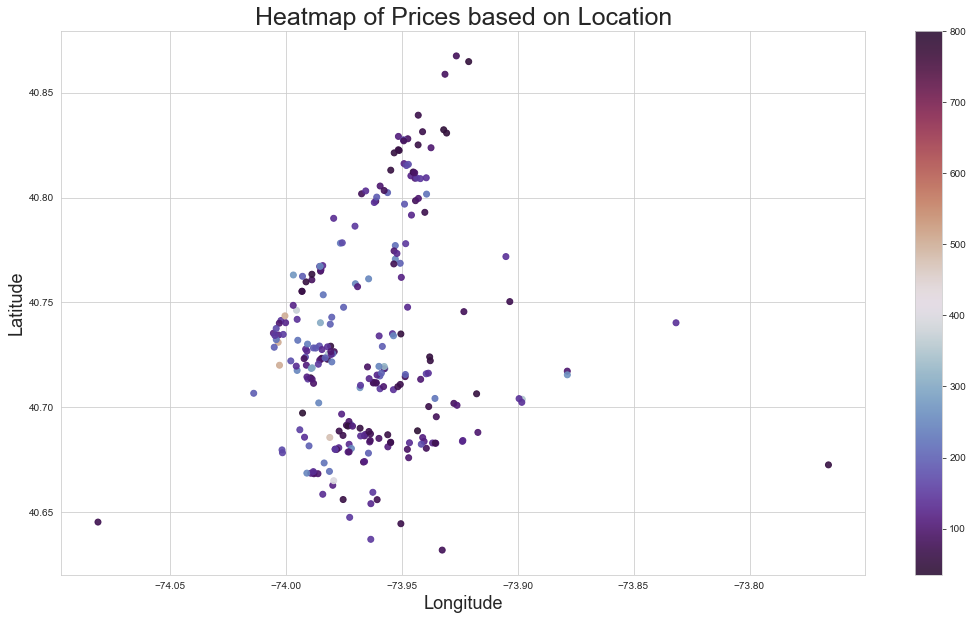

In [31]:
# Create a scatter plot of latitude and longitude with the color map based on the price column

plt.figure(figsize=(18, 10))
sns.set_style('whitegrid')
plt.scatter(airbnb_df['longitude'], airbnb_df['latitude'], c=airbnb_df['price'], cmap='twilight_shifted', alpha=0.9)

# Set the axis labels and title
plt.xlabel('Longitude', fontsize= 18)
plt.ylabel('Latitude', fontsize= 18)
plt.title('Heatmap of Prices based on Location', fontsize= 25)
plt.colorbar()
plt.show()

# Data Cleaning and Visualization for HR Dataset


In [32]:
# Load HR Dataset into a Pandas dataframe
Hr_df = pd.read_csv('HRDataset_v14.csv')

In [33]:
Hr_df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [34]:
# Print the number of Rows and Columns in the Dataset.
print('Number of Rows and Columns in the HR-Dataset: ', Hr_df.shape)


Number of Rows and Columns in the HR-Dataset:  (311, 36)


 # Performing Data Cleaning


In [35]:
# Information about the dataset
Hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

EmpID is a unique value in the dataset from where we can identify the number of duplicate data present in the dataset


In [36]:
## Find duplicates values in the 'EmpID' column

duplicates = Hr_df.duplicated(subset= 'EmpID', keep= False)
Hr_df[duplicates].sort_values('EmpID')

# There are no duplicate value in the id column.


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [37]:
# Drop the 'Zip','DateofTermination','TermReason','LastPerformanceReview_Date'columns
Hr_df.drop(['Zip','DateofTermination','TermReason','LastPerformanceReview_Date'], axis= 1, inplace= True)

In [38]:
# Checking column headers
Hr_df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences'],
      dtype='object')

# Dealing with missing values in ManagerID column


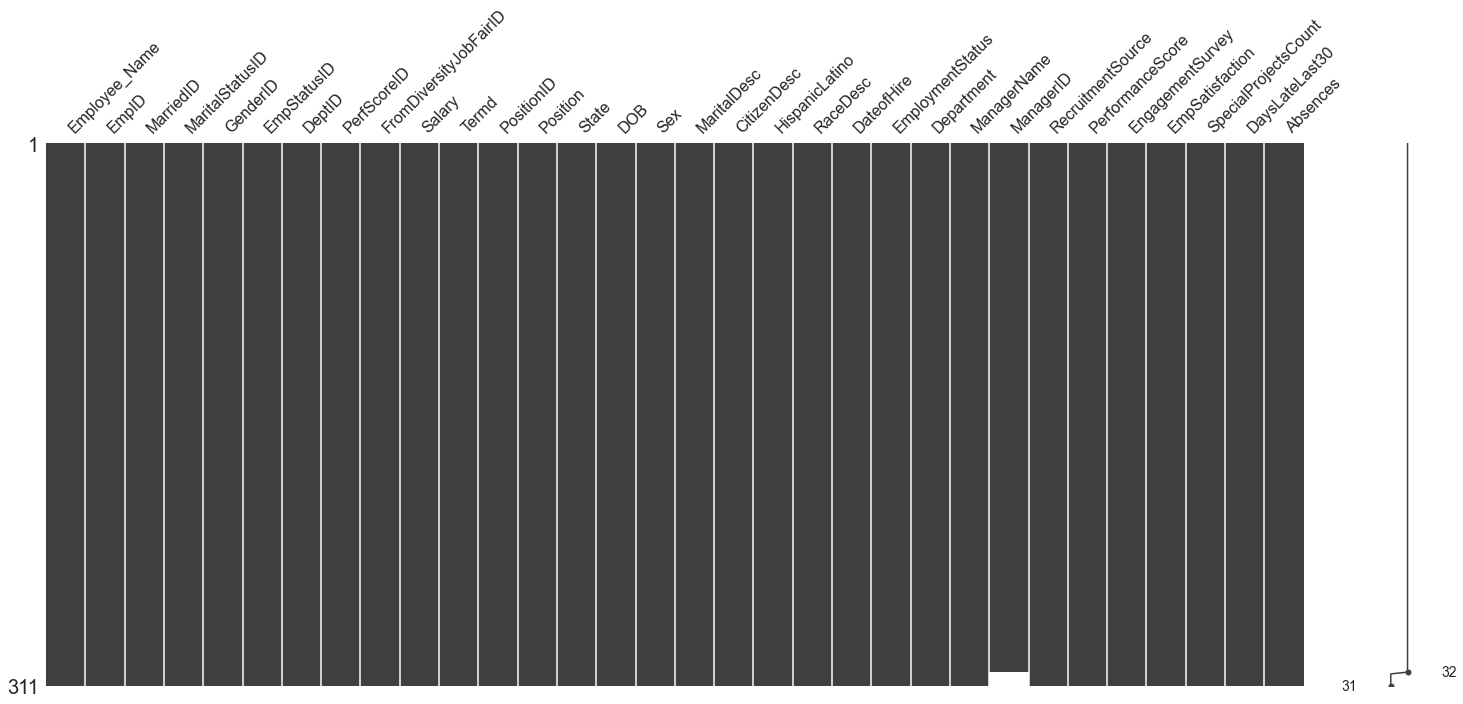

In [39]:
# Visualize the missingness on sorted values 
msno.matrix(Hr_df.sort_values(by= 'ManagerID'))
plt.show()

In [40]:
Hr_df.sort_values(by= 'ManagerID')


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
132,"Howard, Estelle",10182,1,1,0,1,1,3,0,49920,...,Admin Offices,Brandon R. LeBlanc,1.0,Indeed,Fully Meets,3.24,3,4,0,6
160,"LaRotonda, William",10038,0,2,1,1,1,3,0,64520,...,Admin Offices,Brandon R. LeBlanc,1.0,Website,Fully Meets,5.00,4,4,0,3
268,"Steans, Tyrone",10147,0,0,1,1,1,3,0,63003,...,Admin Offices,Brandon R. LeBlanc,1.0,Indeed,Fully Meets,3.90,5,5,0,9
255,"Singh, Nan",10039,0,0,0,1,1,3,0,51920,...,Admin Offices,Brandon R. LeBlanc,1.0,Website,Fully Meets,5.00,3,5,0,2
29,"Brown, Mia",10238,1,1,0,1,1,3,1,63000,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,4.50,2,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,...,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,0,16


Dealing with null values in the ManagerID column for the corresponding ManagerName column through data visualization.






In [41]:
# Fill the missing values in ManagerID column
Hr_df["ManagerID"].fillna(Hr_df.groupby("ManagerName")["ManagerID"].transform("first"), inplace=True)

In [42]:
# Checking for nmull values in the column
Hr_df["ManagerID"].isnull().sum()

0

#   Data Visulizataion 

Visualizing the Data
Pie chart can provide a simple and intuitive way to understand the relative frequencies or proportions of different gender categories within the dataset.

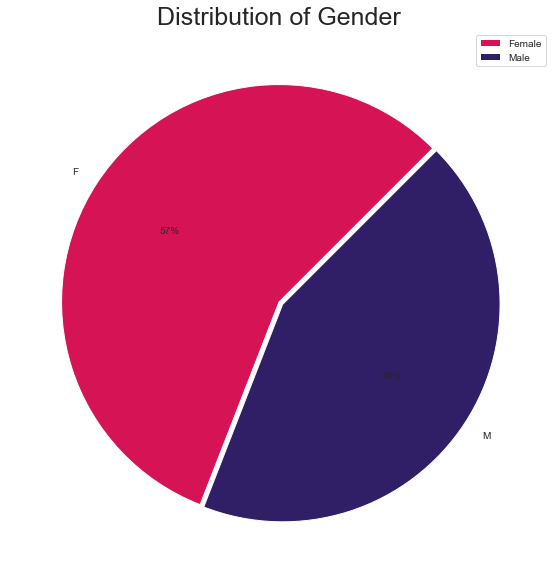

In [43]:
# Pie-chart visualize the relative frequencies or proportions of different gender categories
gender_label = Hr_df['Sex'].value_counts().index
gender_count = Hr_df['Sex'].value_counts()
explode = [0, 0.02]
color = ['#D61355','#301E67']

plt.figure(figsize = (10, 10))
plt.pie(gender_count, labels = gender_label, explode = explode, 
        colors= color, autopct='%1.0f%%', shadow = False, startangle=45)
plt.title('Distribution of Gender', fontsize= 25)

# Define the new labels
new_labels = ['Female', 'Male']
plt.legend(new_labels)
plt.show()

The Bar chart displays the count of individuals by Marital Status and Gender. The x-axis represents the Gender categories (M or F), and the y-axis represents the count of individuals with each Marital Status. The color of each bar within a group represents a different Marital Status category, allowing for easy comparison.






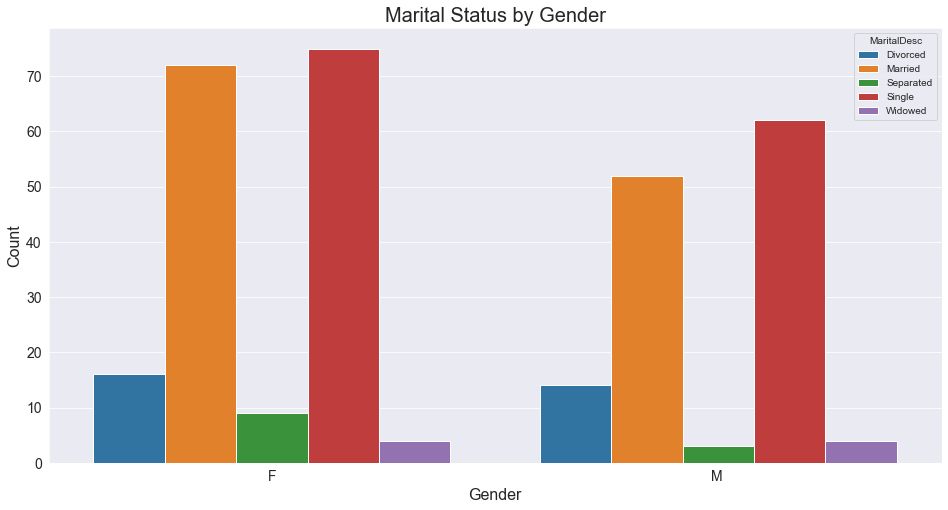

In [44]:
# Group the data by sex and marital status and count the number of occurrences
grouped = Hr_df.groupby(['Sex', 'MaritalDesc']).size().reset_index(name='Count')

# Create the grouped bar chart
plt.figure(figsize = (16, 8))
sns.set_style('darkgrid')
sns.barplot(x='Sex', y='Count', hue='MaritalDesc', data=grouped)

# Set the title and labels for the chart
plt.title('Marital Status by Gender', fontsize= 20)
plt.xlabel('Gender', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()


The distplot function from the seaborn library is an effective way to visualize the distribution of data. By applying distplot to the Salary column in a dataset, it's possible to gain insights into the salary distribution within the dataset.






C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


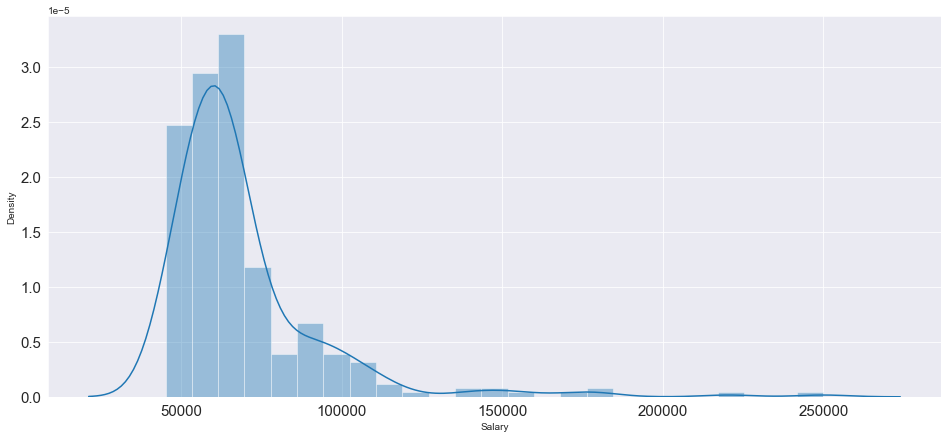

In [45]:
# Visualize distribution of salary
plt.figure(figsize = (16, 7))

sns.distplot(Hr_df['Salary'], bins= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()


Heatmap to visualize the relationship between Marital Status and Employment Status

- Using a heatmap to visualize the relationship between Marital Status and Employment Status provides an effective way to quickly identify patterns and trends in the data.

- The heatmap shows the count of each combination of Marital Status and Employment Status, with the color of each cell indicating the count and the annotation on each cell showing the numeric count value. This allows us to see at a glance which combinations of Marital Status and Employment Status are most common, and which are relatively rare.


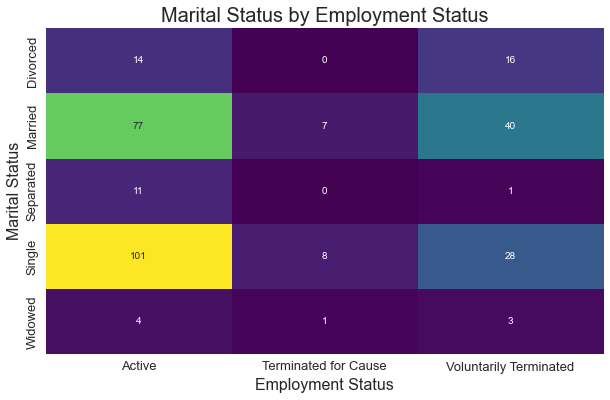

In [46]:
# Create a heatmap of the correlation between Marital Status and Employment Status
heat = pd.crosstab(Hr_df['MaritalDesc'], Hr_df['EmploymentStatus'])

# Create a heatmap of the contingency table
plt.figure(figsize=(10,6))
sns.heatmap(heat, cmap='viridis', annot=True, fmt='d', cbar=False)

# Set plot title and axis labels
plt.title('Marital Status by Employment Status', fontsize= 20)
plt.xlabel('Employment Status', fontsize= 16)
plt.ylabel('Marital Status', fontsize= 16)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()

Barplots in Python are helpful in depicting the correlation between two variables. For instance, by plotting a barplot of the top 10 positions and their corresponding average salary in a dataset, we can easily understand the relationship between the two variables.






In [47]:
avg_salry = Hr_df.groupby('Position')['Salary'].mean()
avg_salry

Position
Accountant I                     63507.666667
Administrative Assistant         52280.000000
Area Sales Manager               64932.555556
BI Developer                     95465.000000
BI Director                     110929.000000
CIO                             220450.000000
Data Analyst                     89932.571429
Data Analyst                     88527.000000
Data Architect                  150290.000000
Database Administrator          108499.600000
Director of Operations          170500.000000
Director of Sales               180000.000000
Enterprise Architect            103613.000000
IT Director                     178000.000000
IT Manager - DB                 144959.500000
IT Manager - Infra              157000.000000
IT Manager - Support            138888.000000
IT Support                       63684.375000
Network Engineer                 61605.000000
President & CEO                 250000.000000
Principal Data Architect        120000.000000
Production Manager       

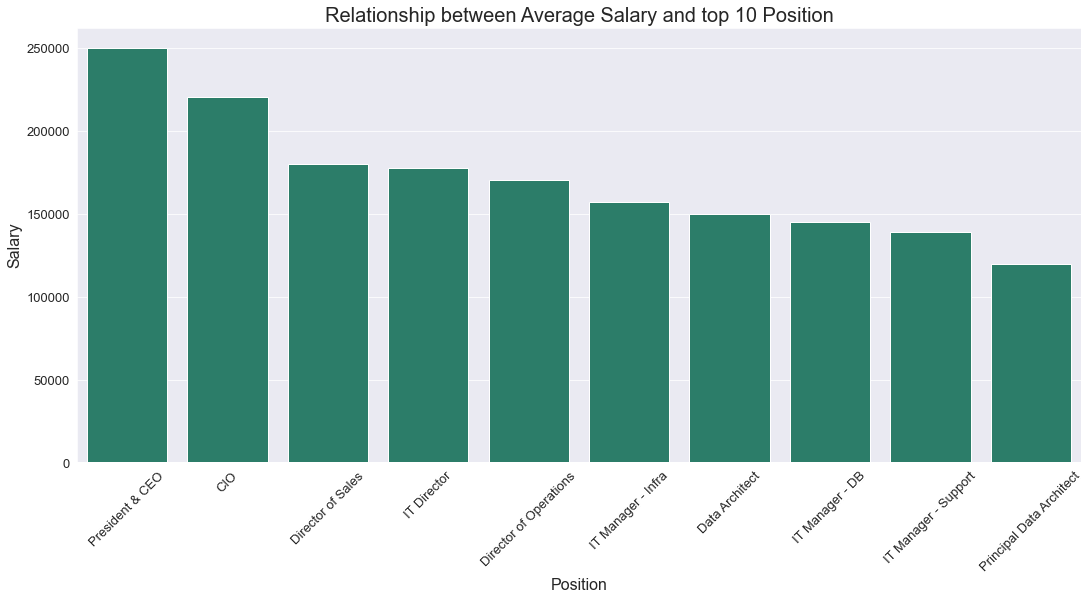

In [48]:
# Visualize relationship between average salary and top 10 position.
top_10_salary = avg_salry.sort_values(ascending=False).head(10)

plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot(x = top_10_salary.index, y = top_10_salary.values, color= '#1F8A70')

# Set the axis labels and title
plt.xlabel('Position', fontsize= 16)
plt.ylabel('Salary', fontsize= 16)
plt.title('Relationship between Average Salary and top 10 Position', fontsize= 20)
plt.xticks(fontsize= 13, rotation=45)
plt.yticks(fontsize= 13)
plt.show()

# Using countplot to visualize the employee count by state

- The countplot() function in the seaborn library is a useful visualization tool to count the number of occurrences of each category in a categorical variable. In this case, the countplot() function can be used to count the number of employees belonging to each state in a given dataset.

- By using the countplot to visualize the employee count by state, one can easily determine which states have the highest and lowest number of employees. This information can be particularly useful in human resources management and workforce planning, as it can provide insights into which states may require more or less resources, or where recruitment efforts may need to be focused.

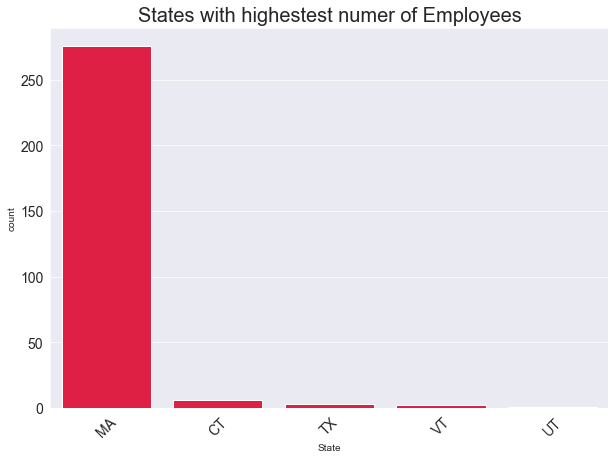

In [49]:
# Creating count plot to visualize the top 5 states 
states = Hr_df['State'].value_counts().head(5).index.tolist()

# filter the DataFrame to keep only the top 10 states
hr_states = Hr_df[Hr_df['State'].isin(states)]

# create a countplot of the top 10 states
plt.figure(figsize=(10, 7))
sns.countplot(x='State', data=hr_states, order=states, color = '#FF0032')
plt.title('States with highestest numer of Employees', fontsize= 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xticks(rotation=45)
plt.show()

Visualizing the relationship between Salary and PositionalID in a scatterplot using Matplotlib can help to identify any patterns or trends in the data.


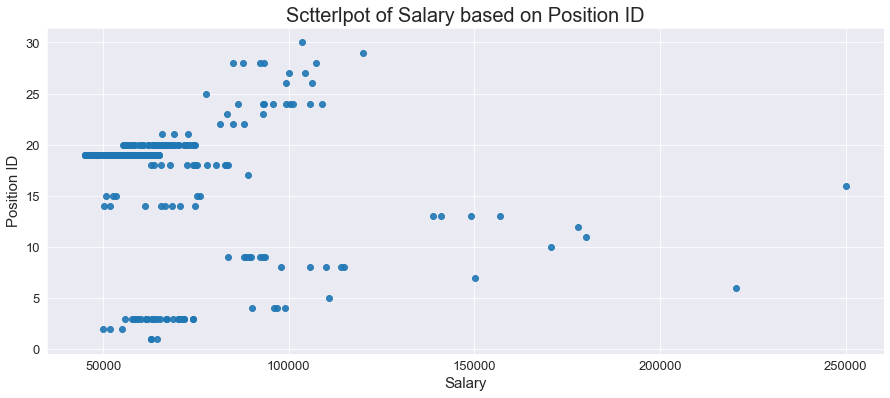

In [50]:
# Create a scatter plot of salry based on positional ID. 

plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
plt.scatter(Hr_df['Salary'], Hr_df['PositionID'], alpha=0.9)

# Set the axis labels and title
plt.xlabel('Salary', fontsize= 15)
plt.ylabel('Position ID', fontsize= 15)
plt.title('Sctterlpot of Salary based on Position ID', fontsize= 20)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()


Visualizing the relationship between average salary and department type can be a useful way to understand how salary is distributed across different departments in an organization.


In [51]:
avg_salry_dpt = Hr_df.groupby('Department')['Salary'].mean()
avg_salry_dpt


Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64

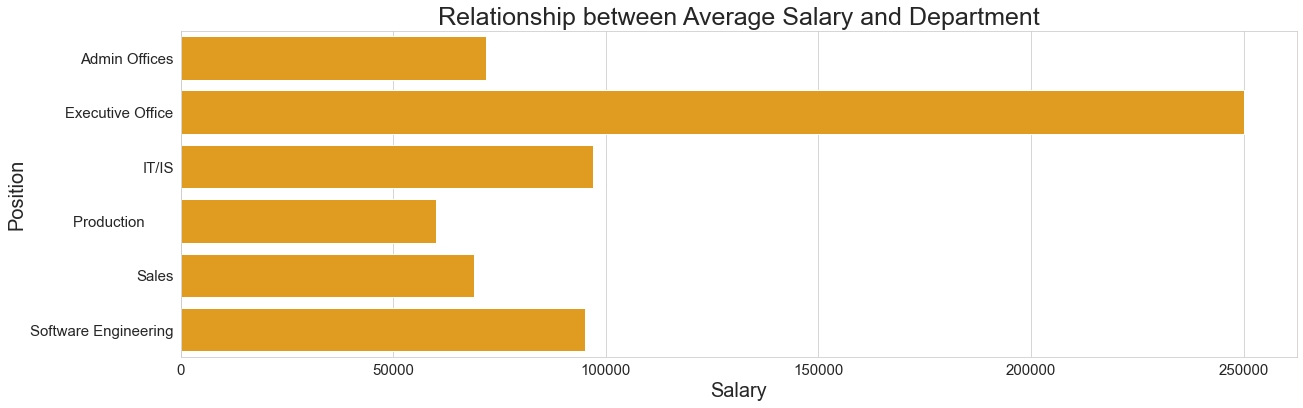

In [52]:
# Visualize relationship between average Salary and Department type.

plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x = avg_salry_dpt.values, y = avg_salry_dpt.index, color= 'Orange', orient= 'horizontal')

# Set the axis labels and title
plt.xlabel('Salary', fontsize= 20)
plt.ylabel('Position', fontsize= 20)
plt.title('Relationship between Average Salary and Department', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

# Rating Distribution by Department using Boxplot
- A box plot is an effective visualization to show the distribution of the rating data for each department type.
- The box plot shows the median (the line in the box), the interquartile range (the edges of the box), the range (the whiskers), and any outliers (the dots outside the whiskers).
- By creating a box plot for each department type, we can easily compare the distribution of the rating data across different departments.
- The box plot can also help identify any potential outliers or skewness in the data. Overall, a box plot is a useful visualization for exploring the relationship between categorical department types and rating data.

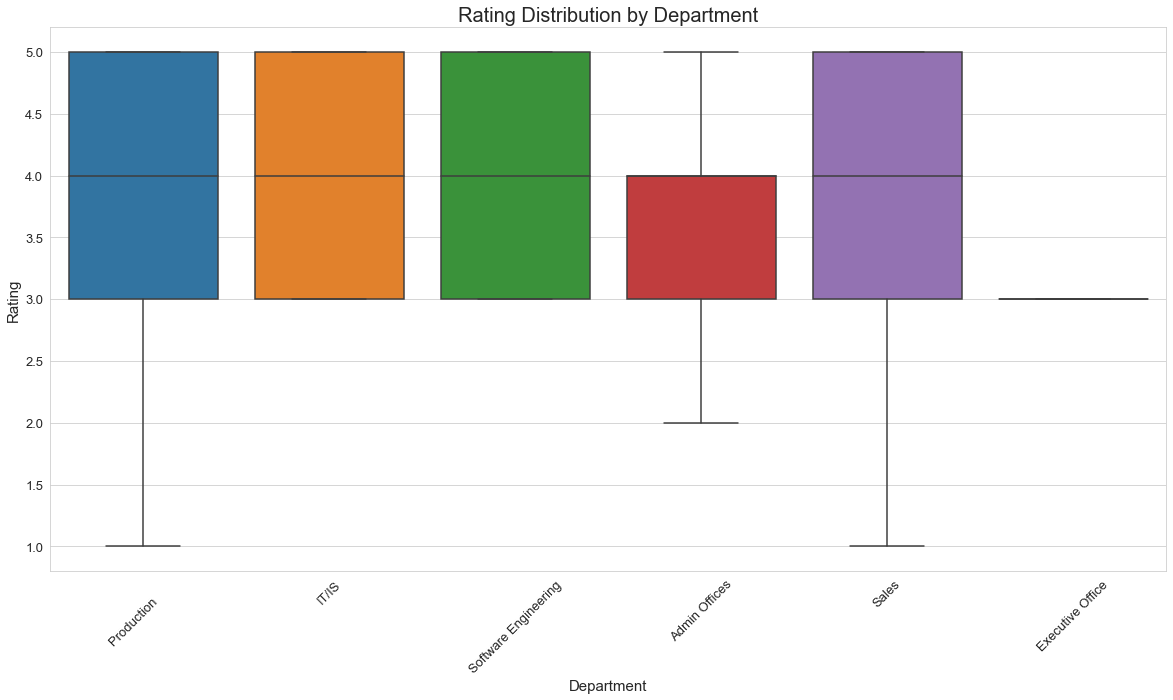

In [53]:
# Create box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Department", y="EmpSatisfaction", data=Hr_df)

# Set title and labels
plt.title("Rating Distribution by Department", fontsize= 20)
plt.xlabel("Department", fontsize= 15)
plt.ylabel("Rating", fontsize= 15)
plt.xticks(fontsize= 13, rotation=45)
plt.yticks(fontsize= 13)
plt.show()

#  Conclusion


In conclusion, we have explored and analyzed the Airbnb dataset and Hr Dataset using various Python libraries such as Pandas, Seaborn, and Matplotlib. We have performed data cleaning and preprocessing, and we have visualized the data to gain insights and identify patterns. We have also used descriptive statistics to summarize and analyze the data. Overall, this project provides a comprehensive analysis of the Airbnb dataset and demonstrates the importance of data visualization and analysis in making informed decisions.






**Thanks for taking the time to go through this project.**
